## Dataset exploration

In [3]:
import pandas as pd
df = pd.read_csv("uncleaned.csv")
df.head(10)

,text,label
0,Una tierra de buro (pronunciau lo mas a-sobén ...,3
1,"O tarquín u tarquil (de l'arabe &lt;*""tarquim""...",3
2,"A halma (pronunciau [ˈxalma], en grafía de 198...",3
3,A esquira ye o proceso de tallar a lana cruda ...,3
4,O lavau d'a lana ye o proceso con que se saca ...,3
5,L'escarmenau ye una fayena d'a lana que consis...,3
6,O vellón (en chistabín velón) ye la cantidat d...,3
7,O cardau d'a lana ye una fayena que se fa con ...,3
8,As cardas (de cardo) yeran unas ferramientas q...,3
9,Una devanadera ye una maquina con un elemento ...,3


In [6]:
dial_label = {
    0 : 'AST',
    1 : 'EU',
    2 : 'GL',
    3 : 'AN',
    4 : 'LAD'
}

fold_label = {
    'AST' : 0,
    'EU' : 1,
    'GL' : 2,
    'AN' : 3,
    'LAD' : 4
}

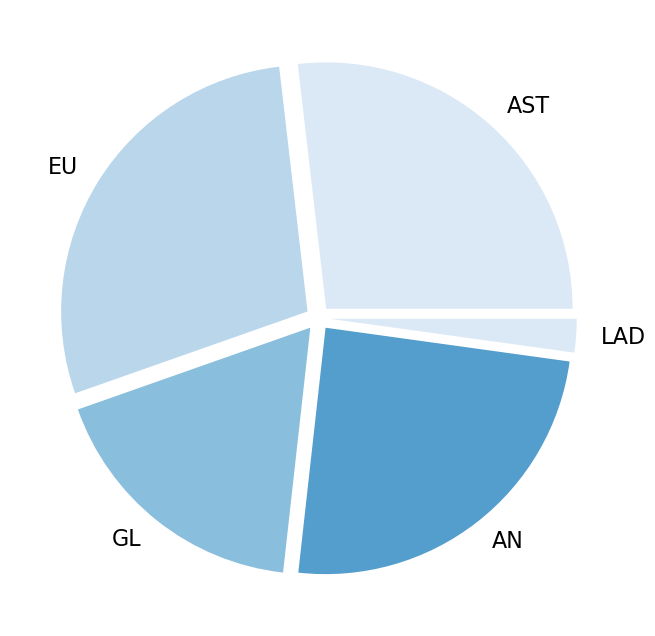

In [7]:
counts = df.groupby('label').count()['text']

import matplotlib.pyplot as plt
import seaborn as sns

labels = [x[:3] for x in fold_label.keys()]
colors = sns.color_palette('Blues')[0:4]

plt.figure(figsize=(8,8))

plt.pie(counts, explode=[0.05]*5, labels = labels, colors = colors, textprops={'fontsize': 16})
#plt.savefig('figure1.pdf', bbox_inches='tight')
plt.show()

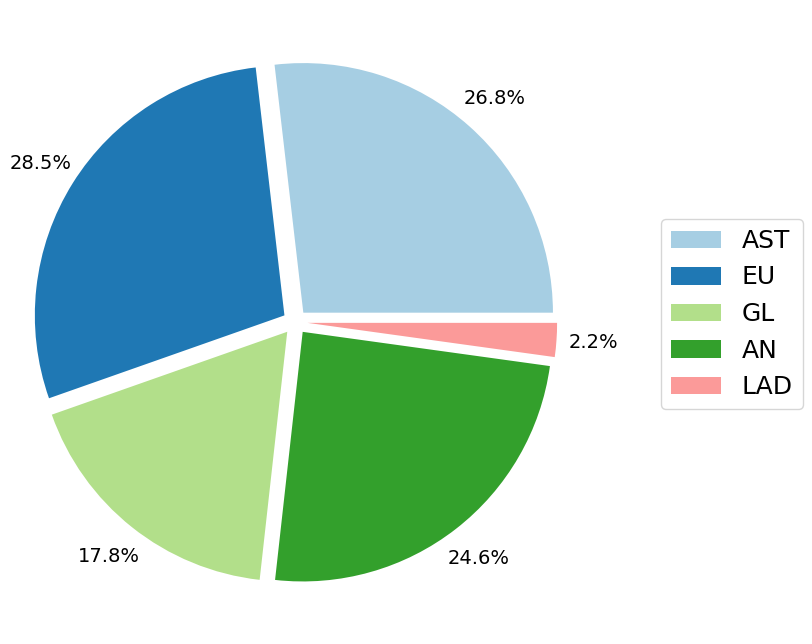

In [9]:
counts = df.groupby('label').count()['text']

import matplotlib.pyplot as plt
import seaborn as sns

labels = [x[:3] for x in fold_label.keys()]
colors = sns.color_palette('Paired')[0:5]



plt.figure(figsize=(8,8))
plt.gca().axis("equal")

pie = plt.pie(counts, explode=[0.05]*5, labels = None, colors = colors, textprops={'fontsize': 14}, autopct='%1.1f%%', pctdistance=1.15,)


plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=18, bbox_transform=plt.gcf().transFigure)

plt.subplots_adjust(left=0.0, bottom=0.1, right=0.7)

#plt.savefig('../plots/distr.pdf', bbox_inches='tight')

In [5]:
from nltk.tokenize import sent_tokenize
counts = [[0]*11, [0]*11]
for l in range(11):
    texts = df[df['label']==l]['text']
    for t in texts:
        numsen = len(sent_tokenize(t))
        if numsen > 2:
            counts[0][l] += 1
        else:
            counts[1][l] += 1

In [6]:
import numpy as np
counts = np.array(counts)

In [7]:
counts

array([[  700,  2145, 26533,  1781,  1178,  2661, 34556,   720,  8370,
         8656,  4704],
       [ 4474, 10506, 39692,  1900, 10794,  5015, 14946,  8338, 15113,
        59762,  2472]])

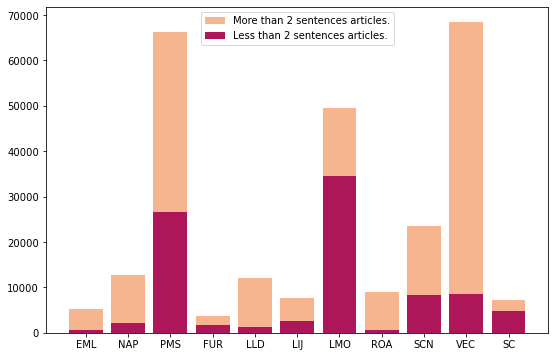

In [8]:
plt.figure(figsize=(9,6))

plt.bar(labels, height=counts[1]+counts[0], label="More than 2 sentences articles.", color=colors[:1])
plt.bar(labels, height=counts[0], label="Less than 2 sentences articles.", color=colors[3:4])

plt.legend(loc='upper center')
#plt.savefig('figure2.pdf', bbox_inches='tight')
plt.show()

## Processed dataset

In [2]:
import pandas as pd

df = pd.read_csv("train.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [14]:
import numpy as np
label, count = np.unique(df["label"], return_counts=True)

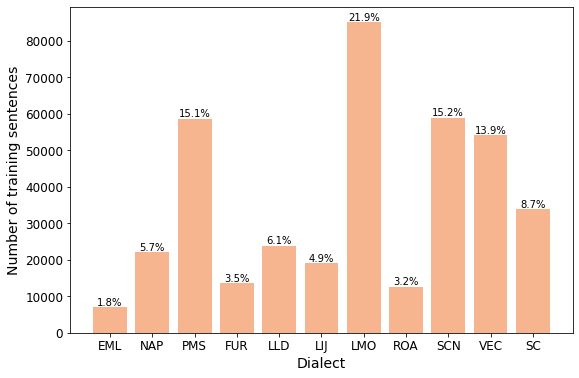

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = [x[:3] for x in fold_label.keys()]
colors = sns.color_palette('rocket_r')[0:11]

plt.figure(figsize=(9,6))

bars = plt.bar(labels, height=count, color=colors[:1])

heights = [b.get_height() for b in bars]
heights = heights / np.sum(heights) * 100


plt.bar_label(bars, labels=['%.1f' % e + "%" for e in heights])

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Dialect", fontsize=14)
plt.ylabel("Number of training sentences", fontsize=14)

plt.savefig('../plots/postproc.pdf', bbox_inches='tight')